# Practicig TextLoaders, that will load texts from websites

In [ ]:
!pip install langchain_community

In [2]:
from langchain.document_loaders import TextLoader # will allow you to load data from the website

In [3]:
loader = TextLoader("nvda_news_1.txt")

In [5]:
data = loader.load()
data

[Document(metadata={'source': 'nvda_news_1.txt'}, page_content="The stock of NVIDIA Corp (NASDAQ:NVDA) experienced a daily loss of -3.56% and a 3-month gain of 32.35%. With an Earnings Per Share (EPS) (EPS) of $1.92, the question arises: is the stock significantly overvalued? This article aims to provide a detailed valuation analysis of NVIDIA, offering insights into its financial strength, profitability, growth, and more. We invite you to delve into this comprehensive analysis.\n\nCompany Overview\nWarning! GuruFocus has detected 10 Warning Signs with NVDA. Click here to check it out.\n\nNVDA 30-Year Financial Data\n\nThe intrinsic value of NVDA\n\n\nNVIDIA Corp (NASDAQ:NVDA) is a leading designer of discrete graphics processing units that enhance the experience on computing platforms. The firm's chips are widely used in various end markets, including PC gaming and data centers. In recent years, NVIDIA has broadened its focus from traditional PC graphics applications such as gaming to

It is actually an array. Array's 0'th element is the document, which has page content as one of its element

In [6]:
data[0].page_content

"The stock of NVIDIA Corp (NASDAQ:NVDA) experienced a daily loss of -3.56% and a 3-month gain of 32.35%. With an Earnings Per Share (EPS) (EPS) of $1.92, the question arises: is the stock significantly overvalued? This article aims to provide a detailed valuation analysis of NVIDIA, offering insights into its financial strength, profitability, growth, and more. We invite you to delve into this comprehensive analysis.\n\nCompany Overview\nWarning! GuruFocus has detected 10 Warning Signs with NVDA. Click here to check it out.\n\nNVDA 30-Year Financial Data\n\nThe intrinsic value of NVDA\n\n\nNVIDIA Corp (NASDAQ:NVDA) is a leading designer of discrete graphics processing units that enhance the experience on computing platforms. The firm's chips are widely used in various end markets, including PC gaming and data centers. In recent years, NVIDIA has broadened its focus from traditional PC graphics applications such as gaming to more complex and favorable opportunities, including artificial

In [7]:
data[0].metadata # other content that the first element of the array has. title of the file

{'source': 'nvda_news_1.txt'}

In [8]:
# similar to text loader, csv loader

from langchain.document_loaders import CSVLoader

loader = CSVLoader("movies.csv")
data = loader.load()

In [9]:
len(data) # 9 elemetns each corresponding to one record in the list

9

In [10]:
data[0] # data from the first row

Document(metadata={'source': 'movies.csv', 'row': 0}, page_content='movie_id: 101\ntitle: K.G.F: Chapter 2\nindustry: Bollywood\nrelease_year: 2022\nimdb_rating: 8.4\nstudio: Hombale Films\nlanguage_id: 3\nbudget: 1\nrevenue: 12.5\nunit: Billions\ncurrency: INR')

In [11]:
data # arr rows ke data

[Document(metadata={'source': 'movies.csv', 'row': 0}, page_content='movie_id: 101\ntitle: K.G.F: Chapter 2\nindustry: Bollywood\nrelease_year: 2022\nimdb_rating: 8.4\nstudio: Hombale Films\nlanguage_id: 3\nbudget: 1\nrevenue: 12.5\nunit: Billions\ncurrency: INR'),
 Document(metadata={'source': 'movies.csv', 'row': 1}, page_content='movie_id: 102\ntitle: Doctor Strange in the Multiverse of Madness\nindustry: Hollywood\nrelease_year: 2022\nimdb_rating: 7\nstudio: Marvel Studios\nlanguage_id: 5\nbudget: 200\nrevenue: 954.8\nunit: Millions\ncurrency: USD'),
 Document(metadata={'source': 'movies.csv', 'row': 2}, page_content='movie_id: 103\ntitle: Thor: The Dark World\nindustry: Hollywood\nrelease_year: 2013\nimdb_rating: 6.8\nstudio: Marvel Studios\nlanguage_id: 5\nbudget: 165\nrevenue: 644.8\nunit: Millions\ncurrency: USD'),
 Document(metadata={'source': 'movies.csv', 'row': 3}, page_content='movie_id: 104\ntitle: Thor: Ragnarok\nindustry: Hollywood\nrelease_year: 2017\nimdb_rating: 7.9\

Gaur se dekho page_content to sbhi 9 ke liye different hai, but metadata sbke liye same hai

In [12]:
type(data)

list

In [13]:
type(data[0])
# Class for storing a piece of text and associated metadata.

langchain_core.documents.base.Document

In [14]:
# this call has 2 elements : page_content (entire record of the csv file separated by \n)
# and metadat has the file name itself
print(data[0].page_content, data[0].metadata)
# metadata is the only way, how model will refer us the page link, or the source of article where it found the data

movie_id: 101
title: K.G.F: Chapter 2
industry: Bollywood
release_year: 2022
imdb_rating: 8.4
studio: Hombale Films
language_id: 3
budget: 1
revenue: 12.5
unit: Billions
currency: INR {'source': 'movies.csv', 'row': 0}


In [15]:
from langchain.document_loaders import CSVLoader

loader = CSVLoader("movies.csv", source_column = "title") # column name, as source/title
data = loader.load()

In [16]:
data[0].metadata
# see the source has been changed now.metadat

{'source': 'K.G.F: Chapter 2', 'row': 0}

![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 767x431 - 18m43s].png](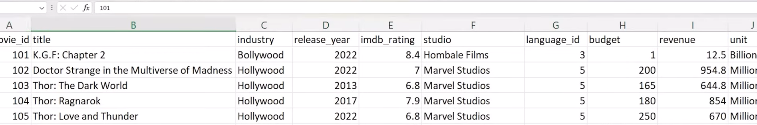)

In [17]:
data[1].metadata

{'source': 'Doctor Strange in the Multiverse of Madness', 'row': 1}

In [18]:
data[1].page_content

'movie_id: 102\ntitle: Doctor Strange in the Multiverse of Madness\nindustry: Hollywood\nrelease_year: 2022\nimdb_rating: 7\nstudio: Marvel Studios\nlanguage_id: 5\nbudget: 200\nrevenue: 954.8\nunit: Millions\ncurrency: USD'

Oh so CSVLoader se each row has become one element of the data[] list. and each element ka page_content uska pura row deta hai and metadata keval title deta hai.

In general case, agar source_column set na krte to file ka nam hi sbke liye metadata ho jata.

Unstructured URL/Data Loader : That is something we are going to use in our project. Since news articles are mostly unstructured

In [19]:
#installing necessary libraries, libmagic is used for file type detection
!pip install python-magic libmagic

  Preparing metadata (setup.py) ... done
  Created wheel for libmagic: filename=libmagic-1.0-py3-none-any.whl size=4269 sha256=99a3d89f30586e88073cb83a66b67a108159ac0b7c7e3b627f31c8629078d5a4
  Stored in directory: /root/.cache/pip/wheels/31/ce/d8/099fbd4dbfa5da5596a39eee8a17d2e1bcc29006c07d3563b7
Successfully built libmagic


In [20]:
from langchain.document_loaders import UnstructuredURLLoader

This library will go to the link/website, look into the DOM object of the the HTML structure, and pull all the information.

In [ ]:
!!pip install unstructured

In [22]:
loader = UnstructuredURLLoader(
    urls = [
        "https://www.moneycontrol.com/news/business/banks/hdfc-bank-re-appoints-sanmoy-chakrabarti-as-chief-risk-officer-11259771.html",
        "https://www.moneycontrol.com/news/business/markets/market-corrects-post-rbi-ups-inflation-forecast-icrr-bet-on-these-top-10-rate-sensitive-stocks-ideas-11142611.html"
    ]
)

In [23]:
data = loader.load()
len(data)

2

In [24]:
data[0]

Document(metadata={'source': 'https://www.moneycontrol.com/news/business/banks/hdfc-bank-re-appoints-sanmoy-chakrabarti-as-chief-risk-officer-11259771.html'}, page_content='English\n\nHindi\n\nGujarati\n\nSpecials\n\nHello, Login\n\nHello, Login\n\nLog-inor Sign-Up\n\nMy Account\n\nMy Profile\n\nMy Portfolio\n\nMy Watchlist\n\nMy Alerts\n\nMy Messages\n\nPrice Alerts\n\nMy Profile\n\nMy PRO\n\nMy Portfolio\n\nMy Watchlist\n\nMy Alerts\n\nMy Messages\n\nPrice Alerts\n\nLogout\n\nLoans up to ₹15 LAKHS\n\nFixed Deposits\n\nCredit CardsLifetime Free\n\nCredit Score\n\nChat with Us\n\nDownload App\n\nFollow us on:\n\nGo Ad-Free\n\nMy Alerts\n\n>->\n\nGo PRO @₹99 PRO\n\nBusiness\n\nMarkets\n\nStocks\n\nEconomy\n\nCompanies\n\nTrends\n\nIPO\n\nOpinion\n\nEV Special\n\nHomeNewsBusinessBanksHDFC Bank re-appoints Sanmoy Chakrabarti as Chief Risk Officer\n\nTrending Topics\n\nRBI Monetary Policy LiveRBI CRR CutVishal Mega Mart IPO GMPHome Loan Interest RateGDP Growth Forecast\n\nHDFC Bank re-appo

In [25]:
data

[Document(metadata={'source': 'https://www.moneycontrol.com/news/business/banks/hdfc-bank-re-appoints-sanmoy-chakrabarti-as-chief-risk-officer-11259771.html'}, page_content='English\n\nHindi\n\nGujarati\n\nSpecials\n\nHello, Login\n\nHello, Login\n\nLog-inor Sign-Up\n\nMy Account\n\nMy Profile\n\nMy Portfolio\n\nMy Watchlist\n\nMy Alerts\n\nMy Messages\n\nPrice Alerts\n\nMy Profile\n\nMy PRO\n\nMy Portfolio\n\nMy Watchlist\n\nMy Alerts\n\nMy Messages\n\nPrice Alerts\n\nLogout\n\nLoans up to ₹15 LAKHS\n\nFixed Deposits\n\nCredit CardsLifetime Free\n\nCredit Score\n\nChat with Us\n\nDownload App\n\nFollow us on:\n\nGo Ad-Free\n\nMy Alerts\n\n>->\n\nGo PRO @₹99 PRO\n\nBusiness\n\nMarkets\n\nStocks\n\nEconomy\n\nCompanies\n\nTrends\n\nIPO\n\nOpinion\n\nEV Special\n\nHomeNewsBusinessBanksHDFC Bank re-appoints Sanmoy Chakrabarti as Chief Risk Officer\n\nTrending Topics\n\nRBI Monetary Policy LiveRBI CRR CutVishal Mega Mart IPO GMPHome Loan Interest RateGDP Growth Forecast\n\nHDFC Bank re-app

In [26]:
data[0].metadata

{'source': 'https://www.moneycontrol.com/news/business/banks/hdfc-bank-re-appoints-sanmoy-chakrabarti-as-chief-risk-officer-11259771.html'}

In [27]:
data[1].metadata

{'source': 'https://www.moneycontrol.com/news/business/markets/market-corrects-post-rbi-ups-inflation-forecast-icrr-bet-on-these-top-10-rate-sensitive-stocks-ideas-11142611.html'}

We will be using this this metadata as our source url links

# Text splitting practice

### So now we have loaded the documents using loaderclasses(UnstructuredDataLoaders) and langchain, next step is text splitting

The reason of text splitting is thst "any llm has token size limit".
1. whole data ko chunks me divide kro.
2. then chunks ko ese merge kro ki they are closure to the token size limit, so that jyada chunks bhi na bne and it will perform more efficiently.
3. We also want to do some overlapping at the end and starting of chunks, so that continuity of context will not be lost, when data will be transferred to LLMs.

![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 767x431 - 23m15s].png](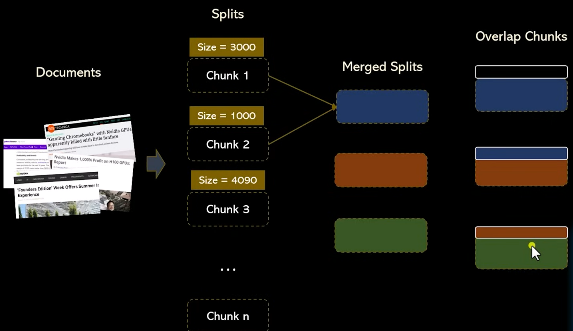)

This can be done using some simple api's of langchain

In [28]:
## Taking some random text from wikipedia

text = """Interstellar is a 2014 epic science fiction drama film directed by Christopher Nolan, who co-wrote the screenplay with his brother Jonathan Nolan. It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine. Set in a dystopian future where Earth is suffering from catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for mankind.
The screenplay had its origins in a script Jonathan developed in 2007 and was originally set to be directed by Steven Spielberg. Theoretical physicist Kip Thorne was an executive producer and scientific consultant on the film, and wrote the tie-in book The Science of Interstellar. Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm. Filming began in late 2013 and took place in Alberta, Klaustur, and Los Angeles. Interstellar uses extensive practical and miniature effects, and the company DNEG created additional digital effects.
Interstellar was released in theaters on November 7, 2014. In the United States, it was first released on film stock, expanding to venues using digital projectors. The film received generally positive reviews and grossed over $681 million worldwide ($730 million after subsequent re-releases), making it the tenth-highest-grossing film of 2014. Thorne's computer-generated depiction of a black hole in the film has also received commendation from astronomers and physicists.[4][5][6] Among its various accolades, Interstellar was nominated for five awards at the 87th Academy Awards, winning Best Visual Effects, and received numerous other accolades. It was Lynda Obst's final film as producer before her death.
In the mid-21st century, humanity faces extinction due to widespread crop blights and dust storms. Joseph Cooper, a widowed former NASA test pilot, works as a farmer and raises his children, Murph and Tom, alongside his father-in-law Donald. Living in a post-truth society, Cooper is reprimanded by Murph's teachers for telling her that the Apollo missions were not fabricated. During a dust storm, the two discover that dust patterns in Murph's room, which she first attributes to a ghost, result from a gravitational anomaly, and translate into geographic coordinates. These lead them to a secret NASA facility headed by Professor John Brand, who explains that, 48 years earlier, a wormhole appeared near Saturn, leading to a system in another galaxy with twelve potentially habitable planets located near a black hole named Gargantua. Volunteers of the Lazarus expedition had previously travelled through the wormhole to evaluate the planets, with Miller, Edmunds, and Mann reporting back desirable results.
Cooper is enlisted to pilot the Endurance spacecraft through the wormhole, as part of a mission to colonize a habitable planet with 5,000 frozen embryos and ensure humanity's survival. Meanwhile, Professor Brand would continue his work on solving a gravity equation, whose solution would supposedly enable construction of spacecraft for a mass exodus from Earth. Cooper accepts against Murphy's wishes and pledges to return. When she refuses to see him off, he leaves her his wristwatch to compare their relative time when he returns.
The crew, consisting of Cooper, robots TARS and CASE, and scientists Dr. Amelia Brand (Professor Brand's daughter), Romilly, and Doyle, traverse the wormhole after a two-year voyage to Saturn. Cooper, Doyle and Brand use a lander to investigate Miller's planet, where time is severely dilated. After landing in knee-high water and finding only wreckage from Miller's expedition, a gigantic tidal wave kills Doyle and waterlogs the lander's engines.
By the time they leave the planet, Cooper and Brand discover that 23 years have elapsed on the Endurance. Having enough fuel left for only one of the other two planets, they vote to go to Mann's, as he is still broadcasting. En route, they receive messages from Earth and Cooper watches Tom grow up, get married, and lose his first son. An adult Murph is now a scientist working on the gravity equation with Professor Brand. On his deathbed, Brand confesses that the Endurance crew was never supposed to return, knowing that a complete solution to the equation was not feasible without observations of gravitational singularities from inside a black hole.
At Mann's planet, they awaken him from cryostasis, and he assures them that colonization is possible, despite the extreme environment. On a scouting mission, Mann attempts to kill Cooper and reveals that he falsified his data in the hope of being rescued. He steals Cooper's lander and heads for the Endurance. While a booby trap set by Mann kills Romilly, Brand rescues Cooper with the other lander and they race back to the Endurance. Mann is killed in a failed manual docking operation, severely damaging the Endurance, but Cooper is able to regain control of the station through a difficult docking maneuver.
With insufficient fuel, Cooper and Brand resort to a slingshot around Gargantua, which will cost them 51 years due to the time dilation. In the process, Cooper and TARS jettison their landers to lighten the Endurance so that Brand and CASE may reach Edmunds' planet. Falling into Gargantua's event horizon, they eject from their craft and find themselves in a tesseract made up of infinite copies of Murph's bedroom across moments in time. Cooper deduces that the tesseract was constructed by advanced humans in the far future, and realizes that he had always been Murph's "ghost". He uses Morse code to manipulate the second hand of the wristwatch he gave her before he left, giving Murphy the data that TARS collected, which enables her to complete Brand's solution.
The tesseract, its purpose fulfilled, collapses and ejects Cooper and TARS. Cooper wakes up on a huge station orbiting Saturn. He reunites with Murph, now on her deathbed, who tells him to seek out Brand. Cooper and TARS take a spacecraft to rejoin Brand and CASE, who are setting up the human colony on Edmunds' habitable planet."""

In [29]:
text

'Interstellar is a 2014 epic science fiction drama film directed by Christopher Nolan, who co-wrote the screenplay with his brother Jonathan Nolan. It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine. Set in a dystopian future where Earth is suffering from catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for mankind.\nThe screenplay had its origins in a script Jonathan developed in 2007 and was originally set to be directed by Steven Spielberg. Theoretical physicist Kip Thorne was an executive producer and scientific consultant on the film, and wrote the tie-in book The Science of Interstellar. Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm. Filming began in late 2013 and took place in Alberta, Klaustur, and Los Angeles. Interstellar uses extensive practical and minia

In [30]:
# way1 . of text spletting, each chunk is of size 200 character: use slice operator

text[:200] # it might cutoff the words in between, like jessica Chastin is full word, but cut at jessica

'Interstellar is a 2014 epic science fiction drama film directed by Christopher Nolan, who co-wrote the screenplay with his brother Jonathan Nolan. It stars Matthew McConaughey, Anne Hathaway, Jessica '

So the simple slice operator will not work

In [39]:
# way 2 : for loop

chunks = []
s = ""

for word in text:
   s += word
   if len(s) > 200:
    chunks.append(s);
    s = "";

chunks.append(s)

In [40]:
chunks
# each of the chunks is == 200 characters, except last may be < 200

['Interstellar is a 2014 epic science fiction drama film directed by Christopher Nolan, who co-wrote the screenplay with his brother Jonathan Nolan. It stars Matthew McConaughey, Anne Hathaway, Jessica C',
 'hastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine. Set in a dystopian future where Earth is suffering from catastrophic blight and famine, the film follows a group of astronauts who tra',
 'vel through a wormhole near Saturn in search of a new home for mankind.\nThe screenplay had its origins in a script Jonathan developed in 2007 and was originally set to be directed by Steven Spielberg. ',
 'Theoretical physicist Kip Thorne was an executive producer and scientific consultant on the film, and wrote the tie-in book The Science of Interstellar. Cinematographer Hoyte van Hoytema shot it on 35 ',
 'mm movie film in the Panavision anamorphic format and IMAX 70 mm. Filming began in late 2013 and took place in Alberta, Klaustur, and Los Angeles. Interstellar uses extensiv

In [41]:
len(chunks)

31

But writting custom for loops won't be efficient. It will take much time

langchain provides very simple api, so you don't have to do work manually.

The api is given through various text splitter classes. Let's try the first simplest one.

In [42]:
from langchain.text_splitter import CharacterTextSplitter # split based on character count

splitter = CharacterTextSplitter(
    separator="\n", # split based on this
    chunk_size = 200, # expected chink size is 200 characters only, but proimary separater is \n
    chunk_overlap=0
)

chunks = splitter.split_text(text)
len(chunks)

10

Split is done at \n. so in 10 chinks the chunk size if more than expected given value i.e. 200 characters

total 10 chunks banaya

In [43]:
for chunk in chunks:
  print(len(chunk))

473
594
712
1010
534
448
655
612
768
330


In [45]:
chunks[0]

'Interstellar is a 2014 epic science fiction drama film directed by Christopher Nolan, who co-wrote the screenplay with his brother Jonathan Nolan. It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine. Set in a dystopian future where Earth is suffering from catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for mankind.'

75 words, 473 character

In [48]:
print(chunks[3])

In the mid-21st century, humanity faces extinction due to widespread crop blights and dust storms. Joseph Cooper, a widowed former NASA test pilot, works as a farmer and raises his children, Murph and Tom, alongside his father-in-law Donald. Living in a post-truth society, Cooper is reprimanded by Murph's teachers for telling her that the Apollo missions were not fabricated. During a dust storm, the two discover that dust patterns in Murph's room, which she first attributes to a ghost, result from a gravitational anomaly, and translate into geographic coordinates. These lead them to a secret NASA facility headed by Professor John Brand, who explains that, 48 years earlier, a wormhole appeared near Saturn, leading to a system in another galaxy with twelve potentially habitable planets located near a black hole named Gargantua. Volunteers of the Lazarus expedition had previously travelled through the wormhole to evaluate the planets, with Miller, Edmunds, and Mann reporting back desirabl

153 words 1010 characters

In [49]:
from langchain.text_splitter import CharacterTextSplitter # split based on character count

splitter = CharacterTextSplitter(
    separator=".", # split based on '.', not /n to reach near 200 characters
    chunk_size = 200, # expected chink size is 200 characters only, but proimary separater is \n
    chunk_overlap=0
)

chunks = splitter.split_text(text)
len(chunks)

39

In [50]:
for chunk in chunks:
  print(len(chunk))

145
119
204
127
151
193
175
103
179
128
176
158
141
134
191
265
171
183
176
170
191
99
153
104
117
198
229
133
174
124
174
135
128
171
140
185
125
76
124


But we need something, more advanced, which can split things on multiple separateors so that it tries to limit at max 200 charcter, dones not go beyond it. Line '\n' ke case me 200 se upar 10 chale gye the, un piece of codes me no '\n'. Here, '.' ke case me 3 chunks 200 characters se jyada size ke the jinme koi '.' hi nhi tha.

So we want combination of multiple splitters so that the character counts limit eont exceed 200.

In [51]:
# se chacater text splitter of recursive in nature, we need to use.

In [52]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

r_splitter = RecursiveCharacterTextSplitter(
    separators = ["\n\n", "\n", " "], # first is \n\n, 2nd is \n, third is space
    chunk_size = 200,
    chunk_overlap = 0
)

chunks = r_splitter.split_text(text)
len(chunks)

37

So this time no warning : means all the chunks are <= 200 character. Multiple division options de dene se 200 se upar nhi gye chunks.

In [53]:
for chunk in chunks:
  print(len(chunk))

199
198
74
191
199
193
8
191
195
195
128
196
194
199
194
199
23
195
198
139
192
196
58
198
194
191
69
198
193
191
27
194
194
199
178
197
132


Internally : what is it doing :

In [56]:
len(text.split("\n\n")) # first splitting based on 2 new lines(\n\n)

1

hmare original text me "\n\n" wala separtor nhi hai

In [58]:
first_split = text.split("\n\n")
len(first_split[0])

6145

noe assume \n\n se separate krne me x pieces aa rhe hain. if the length or total character count in any piece is > 200, it will further split that big chunk using the second operator, which is "\n"

In [60]:
first_split[0].split("\n")

['Interstellar is a 2014 epic science fiction drama film directed by Christopher Nolan, who co-wrote the screenplay with his brother Jonathan Nolan. It stars Matthew McConaughey, Anne Hathaway, Jessica Chastain, Bill Irwin, Ellen Burstyn, Matt Damon, and Michael Caine. Set in a dystopian future where Earth is suffering from catastrophic blight and famine, the film follows a group of astronauts who travel through a wormhole near Saturn in search of a new home for mankind.',
 'The screenplay had its origins in a script Jonathan developed in 2007 and was originally set to be directed by Steven Spielberg. Theoretical physicist Kip Thorne was an executive producer and scientific consultant on the film, and wrote the tie-in book The Science of Interstellar. Cinematographer Hoyte van Hoytema shot it on 35 mm movie film in the Panavision anamorphic format and IMAX 70 mm. Filming began in late 2013 and took place in Alberta, Klaustur, and Los Angeles. Interstellar uses extensive practical and m

In [61]:
len(first_split[0].split("\n"))

10

So now the big chunks will be splitted on '\n', resulting in the 10 splits

In [63]:
second_split = first_split[0].split("\n")

In [64]:
for chunk in second_split:
  print(len(chunk))

473
594
712
1010
534
448
655
612
768
330


Now length > 200 wale sare chunks me, our recursive langchain separtor will separte then into new chunks based on space(" ") where size < 200 but mort imp , **trys to keep as many characters as possible before 200.**

This is the advantage of using API. It won't split at each space or  '\n' or '\n\n', it will try to come as closer to 200 as possible, then only it will split.

In [65]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

r_splitter = RecursiveCharacterTextSplitter(
    separators = ["\n\n", "\n", " "], # first is \n\n, 2nd is \n, third is space
    chunk_size = 200,
    chunk_overlap = 0
)

chunks = r_splitter.split_text(text)
len(chunks)

37

In [67]:
for chunk in chunks:
  print(len(chunk))

199
198
74
191
199
193
8
191
195
195
128
196
194
199
194
199
23
195
198
139
192
196
58
198
194
191
69
198
193
191
27
194
194
199
178
197
132


This is something we will be using in our news research tool.

# Now vector databases

We will use FAISS : Lightweight in memory vector database

![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 819x461 - 33m32s].png](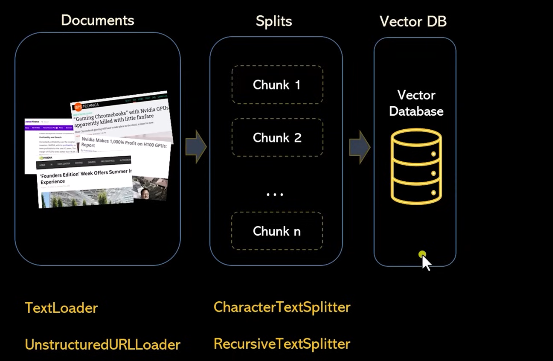)

![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 819x461 - 33m39s].png](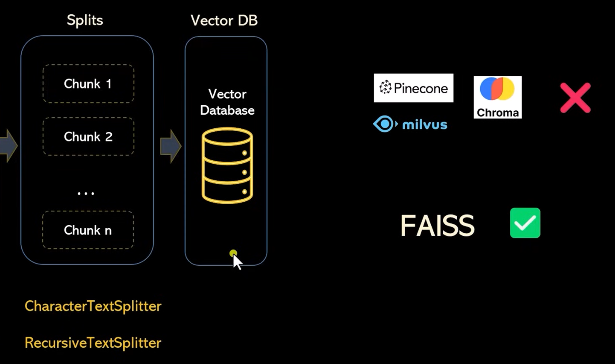)

![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 819x461 - 33m48s].png](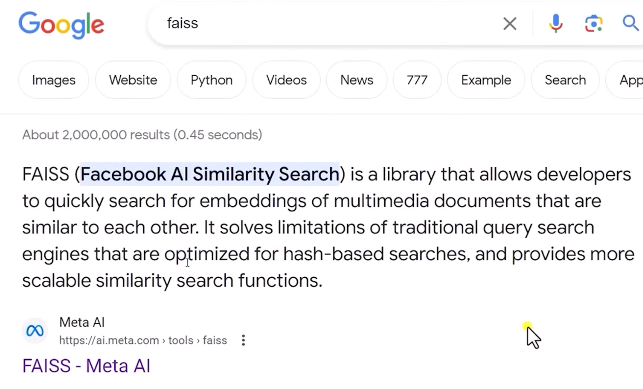)

Chunks => converted into embedding using any of techniques like openAI embedding, hugging face embeddings , word to vec etc.

Then we will store them(embeddings) into vector databases. We are going to store them in faiss index. This is in memory structure, which can do faster search on your vectors

![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 819x461 - 35m09s].png](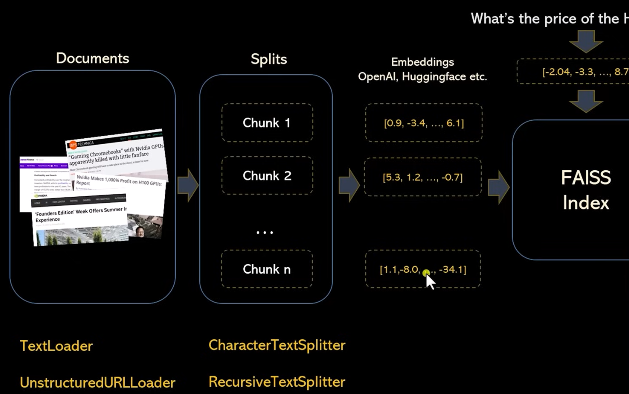)

FAISS will tell you out of all the vectors, how many are similar

![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 819x461 - 35m22s].png](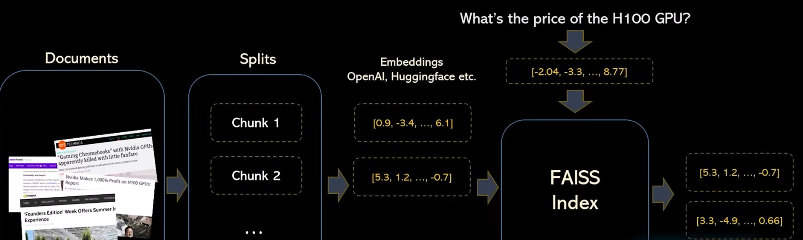)

# Example working with FAISE index and seaching query from the vector database.

In [ ]:
!pip install faiss-cpu
!pip install sentence-transformers

In [69]:
import pandas as pd

In [70]:
df = pd.read_csv('sample_text.csv')

In [71]:
df

,text,category
0,Meditation and yoga can improve mental health,Health
1,"Fruits, whole grains and vegetables helps cont...",Health
2,These are the latest fashion trends for this week,Fashion
3,Vibrant color jeans for male are becoming a trend,Fashion
4,The concert starts at 7 PM tonight,Event
5,Navaratri dandiya program at Expo center in Mu...,Event
6,Exciting vacation destinations for your next trip,Travel
7,Maldives and Srilanka are gaining popularity i...,Travel


In [72]:
# now i will convert these 8 senteces into vectors

from sentence_transformers import SentenceTransformer

encoder = SentenceTransformer("all-mpnet-base-v2") # convert text into vecotrs

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [73]:
vectors = encoder.encode(df.text)

In [75]:
vectors.shape

(8, 768)

total 8 vectors, each of length or 768 elements.

In [76]:
vectors

array([[-0.00247395,  0.03626722, -0.05290459, ..., -0.09152356,
        -0.03970001, -0.04330489],
       [-0.03357267,  0.00980519, -0.03250129, ..., -0.05165466,
         0.02245887, -0.03156182],
       [-0.01865322, -0.04051318, -0.01235387, ...,  0.00610586,
        -0.07179645,  0.02773851],
       ...,
       [-0.00066458,  0.04252127, -0.05645508, ...,  0.0131547 ,
        -0.03183567, -0.04357665],
       [-0.03317153,  0.03252455, -0.02484838, ...,  0.0117442 ,
         0.05747124,  0.00571023],
       [-0.00166395,  0.00413828, -0.04597083, ...,  0.02008527,
         0.05656243, -0.00161596]], dtype=float32)

In [78]:
vectors.shape[1] # kind of number of columns in a 2d matrix

768

In [79]:
import faiss

index = faiss.IndexFlatL2(vectors.shape[1]) # it uses Euclidian distance to do similarity search

index # empty index

<faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7a63470f5950> >

In [80]:
# adding vecotor in the empty index
index.add(vectors)

In [81]:
index

<faiss.swigfaiss_avx2.IndexFlatL2; proxy of <Swig Object of type 'faiss::IndexFlatL2 *' at 0x7a63470f5950> >

so vector is ready. FAISS index will create some kind of datastructure internally, which will allow you to do faster similarity search, instead of doing linear search.

In [82]:
search_query = "I want to buy a cricket bat"

vec = encoder.encode(search_query)
vec.shape

(768,)

Converting vector into 2d, since index search expect 2d array

In [83]:
import numpy as np

search_vector = np.array(vec).reshape(1,-1)
search_vector.shape

(1, 768)

In [84]:
index.search(search_vector, k=2) # returns a tuple, i want 2 similar indeces.
# k=2 is like k nearest euclidian indeces like SNN classifiers

(array([[1.6672758, 1.7793772]], dtype=float32), array([[7, 5]]))

the first one is the distances : [[1.6672758, 1.7793772]].

and the second one is : [[7, 5]] i.e. the indices of that distances in the vecotor database.

Smallest distance == more similar

In [85]:
distances, I = index.search(search_vector, k=2)

In [86]:
I

array([[7, 5]])

In [89]:
df

,text,category
0,Meditation and yoga can improve mental health,Health
1,"Fruits, whole grains and vegetables helps cont...",Health
2,These are the latest fashion trends for this week,Fashion
3,Vibrant color jeans for male are becoming a trend,Fashion
4,The concert starts at 7 PM tonight,Event
5,Navaratri dandiya program at Expo center in Mu...,Event
6,Exciting vacation destinations for your next trip,Travel
7,Maldives and Srilanka are gaining popularity i...,Travel


In [90]:
df.loc[I[0]]

,text,category
7,Maldives and Srilanka are gaining popularity i...,Travel
5,Navaratri dandiya program at Expo center in Mu...,Event


It is semantic search, capturing meaning of the sentence and giving search based on meaning of sentences.

In [94]:
sq = "An amla(Indian gooseberry) a day keeps the doctor away"

v = encoder.encode(sq)

sv = np.array(v).reshape(1,-1)

sv.shape

(1, 768)

In [95]:
dist, I = index.search(sv, k=2)

In [96]:
df.loc[I[0]]

,text,category
5,Navaratri dandiya program at Expo center in Mu...,Event
1,"Fruits, whole grains and vegetables helps cont...",Health


see search results related to healht

# Retrival of relevant chunks : benefit is :
# we can tackle the problem of token limits

![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 819x461 - 45m34s].png](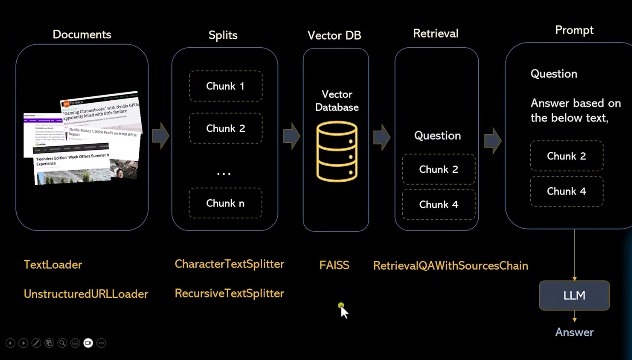)

![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 819x461 - 45m55s].png](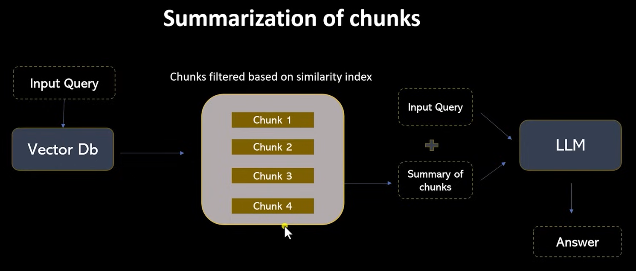)

![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 819x461 - 46m04s].png](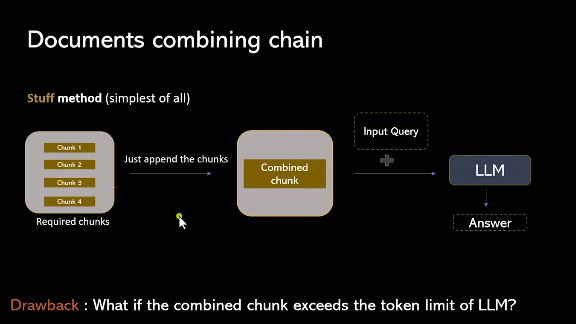)

This is the drawback of this **stuff** method. We should ensure that the "combined chunk + input query" should not cross the LLM's tockens limit.

**When the combined chunk size is bigger, the better methid is map-reduce method**

In this we make individual LLM calls per chunks. Now each chunk se relevant content nikalkr new combined chunk + input query ko final LLM me pass kr do, to get final response/output.

![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 819x461 - 47m46s].png](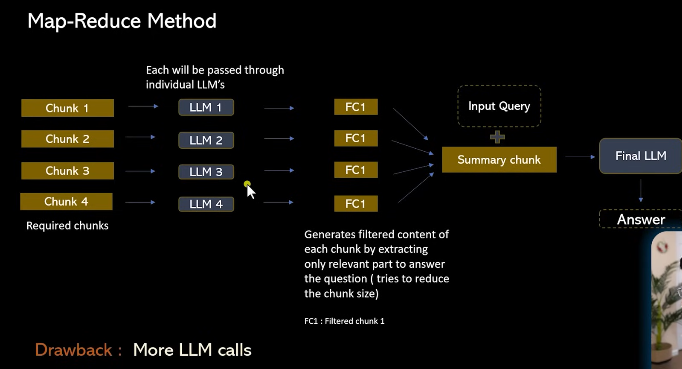)

In [99]:
import os
import pickle
import time
import langchain
from langchain import OpenAI
from langchain.chains import RetrievalQAWithSourcesChain
from langchain.chains.qa_with_sources.loading import load_qa_with_sources_chain
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import UnstructuredURLLoader
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS

In [102]:
!pip install python-dotenv # for opening api kay

In [105]:
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv(load_dotenv('groq.env'))

# Get the API key
api_key = os.getenv('API_KEY')

# print(api_key)  # Verify the key is loaded

specific library like langchain_groq that provides a direct interface for using Groq's LLaMA models

In [108]:
!pip install langchain_groq

In [ ]:
from langchain_groq import ChatGroq

# Step 1: Load the API key from a .env file
load_dotenv("groq.env")
groq_api_key = os.getenv("API_KEY")

# Step 2: Initialize the ChatGroq LLM
llm = ChatGroq(
    model="llama-3.1-70b-versatile",
    temperature = 0.9,  # No randomness; deterministic responses
    max_tokens=500,  # Limit the response to 500 tokens
    groq_api_key = groq_api_key
)


In [111]:
# Step 3: Generate a response using invoke()
response = llm.invoke("What is the capital of India?")
print(response)

content='The capital of India is New Delhi.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 42, 'total_tokens': 51, 'completion_time': 0.036, 'prompt_time': 0.007006214, 'queue_time': 0.040456608000000005, 'total_time': 0.043006214}, 'model_name': 'llama-3.1-70b-versatile', 'system_fingerprint': 'fp_1c3737e28c', 'finish_reason': 'stop', 'logprobs': None} id='run-2bcc6786-c601-48db-864b-3703775f3f5f-0' usage_metadata={'input_tokens': 42, 'output_tokens': 9, 'total_tokens': 51}


(1) Load data

In [112]:
loaders = UnstructuredURLLoader(urls=[
    "https://www.moneycontrol.com/news/business/markets/wall-street-rises-as-tesla-soars-on-ai-optimism-11351111.html",
    "https://www.moneycontrol.com/news/business/tata-motors-launches-punch-icng-price-starts-at-rs-7-1-lakh-11098751.html"
])
data = loaders.load()
len(data)

2

(2) Split data to create chunks

In [113]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 200
)

# As data is of type documents we can directly use split_documents over split_text in order to get the chunks.
docs = text_splitter.split_documents(data)
len(docs)

10

In [114]:
docs[9]

Document(metadata={'source': 'https://www.moneycontrol.com/news/business/tata-motors-launches-punch-icng-price-starts-at-rs-7-1-lakh-11098751.html'}, page_content='Copyright © Network18 Media & Investments Limited. All rights reserved. Reproduction of news articles, photos, videos or any other content in whole or in part in any form or medium without express writtern permission of moneycontrol.com is prohibited.\n\nYou got 30 Day’s Trial of\n\nGrab it Now\n\nAd-Free Experience\n\nTop Articles from Financial Times\n\nActionable Insights\n\nMC Research\n\nEconomic Calendar\n\n& Many More\n\nYou are already a Moneycontrol Pro user.\n\nFaizan Javed')

(3) Create embeddings for these chunks and save them to FAISS index

Using SentenceTransformer("all-mpnet-base-v2") is a highly effective approach for creating embeddings, especially when you need strong semantic embeddings that capture the meaning of texts well.
What is SentenceTransformer?

    Model: all-mpnet-base-v2 is a pre-trained model from the sentence-transformers library. It's designed to generate high-quality sentence embeddings that are well-suited for tasks like similarity search, clustering, and text classification.
    Advantages:
        High-Quality Embeddings: Models from the sentence-transformers library are fine-tuned to produce semantically rich embeddings that are effective across various NLP tasks.
        Scalability: all-mpnet-base-v2 is capable of handling multiple languages and offers robust embeddings for diverse textual content.
        Ease of Integration: Easily integrates with existing pipelines via the langchain library.

In [119]:
docs

[Document(metadata={'source': 'https://www.moneycontrol.com/news/business/markets/wall-street-rises-as-tesla-soars-on-ai-optimism-11351111.html'}, page_content='English\n\nHindi\n\nGujarati\n\nSpecials\n\nHello, Login\n\nHello, Login\n\nLog-inor Sign-Up\n\nMy Account\n\nMy Profile\n\nMy Portfolio\n\nMy Watchlist\n\nMy Alerts\n\nMy Messages\n\nPrice Alerts\n\nMy Profile\n\nMy PRO\n\nMy Portfolio\n\nMy Watchlist\n\nMy Alerts\n\nMy Messages\n\nPrice Alerts\n\nLogout\n\nLoans up to ₹15 LAKHS\n\nFixed Deposits\n\nCredit CardsLifetime Free\n\nCredit Score\n\nChat with Us\n\nDownload App\n\nFollow us on:\n\nGo Ad-Free\n\nMy Alerts\n\n>->\n\nGo PRO @₹99 PRO\n\nBusiness\n\nMarkets\n\nStocks\n\nEconomy\n\nCompanies\n\nTrends\n\nIPO\n\nOpinion\n\nEV Special\n\nHomeNewsBusinessMarketsWall Street rises as Tesla soars on AI optimism\n\nTrending Topics\n\nSensex TodayRBI MPC Meeting LiveSuraksha Diagnostic Share PriceGanesh Infraworld Share PriceAngel One Share PriceVedanta Share Price\n\nWall Street

In [ ]:
# Create the embeddings of the chunks using openAIEmbeddings
# embeddings = OpenAIEmbeddings()  : As i am not using open ai ai


In [131]:
from langchain.vectorstores import FAISS
from langchain.embeddings import HuggingFaceEmbeddings
from sentence_transformers import SentenceTransformer

# Load the SentenceTransformer model
encoder = HuggingFaceEmbeddings(model_name="all-mpnet-base-v2")  # Use LangChain wrapper for compatibility

# Create a FAISS index from documents
vectorIndex = FAISS.from_documents(docs, encoder)

print("FAISS index created successfully.")

<ipython-input-131-bef6788acd21>:6: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  encoder = HuggingFaceEmbeddings(model_name="all-mpnet-base-v2")  # Use LangChain wrapper for compatibility


FAISS index created successfully.


In [132]:
vectorIndex

In [133]:
# Print the vector index information
print(vectorIndex)


In [135]:
query = "How is money flowing?"
results = vectorIndex.similarity_search(query, k=1)  # Adjust `k` as needed

for result in results:
    print("Content:", result.page_content)
    print("Metadata:", result.metadata)


Content: Copyright © Network18 Media & Investments Limited. All rights reserved. Reproduction of news articles, photos, videos or any other content in whole or in part in any form or medium without express writtern permission of moneycontrol.com is prohibited.

You got 30 Day’s Trial of

Grab it Now

Ad-Free Experience

Top Articles from Financial Times

Actionable Insights

MC Research

Economic Calendar

& Many More

You are already a Moneycontrol Pro user.

Faizan Javed
Metadata: {'source': 'https://www.moneycontrol.com/news/business/markets/wall-street-rises-as-tesla-soars-on-ai-optimism-11351111.html'}


In [136]:
# storing the vector index create in local

file_path = "vector_index.pkl"

with open(file_path,"wb") as f:
  pickle.dump(vectorIndex, f)

In [137]:
if os.path.exists(file_path):
  with open(file_path, "rb") as f:
    vector_index = pickle.load(f)

In [138]:
chain = RetrievalQAWithSourcesChain.from_llm(llm = llm, retriever = vector_index.as_retriever() )
chain

RetrievalQAWithSourcesChain(verbose=False, combine_documents_chain=MapReduceDocumentsChain(verbose=False, llm_chain=LLMChain(verbose=False, prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Use the following portion of a long document to see if any of the text is relevant to answer the question. \nReturn any relevant text verbatim.\n{context}\nQuestion: {question}\nRelevant text, if any:'), llm=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7a6335a016c0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7a6335a001f0>, model_name='llama-3.1-70b-versatile', temperature=0.9, model_kwargs={}, groq_api_key=SecretStr('**********'), max_tokens=500), output_parser=StrOutputParser(), llm_kwargs={}), reduce_documents_chain=ReduceDocumentsChain(verbose=False, combine_documents_chain=StuffDocumentsChain(verbose=False, llm_chain=LLMChain(verbose=False, prompt=PromptTemplate(input_variabl

The `chain` variable will store a **RetrievalQAWithSourcesChain** object, which is a complete pipeline for answering questions using retrieved documents. Here's a simplified explanation of what is stored in the `chain` variable and its purpose:

---

### **What Is Stored in `chain`?**
The `chain` object encapsulates the following:
1. **Language Model (`llm`)**:
   - This is the AI model (like OpenAI's GPT or any other compatible LLM) that generates the final answer to the user's query.
   
2. **Retriever (`retriever`)**:
   - This component fetches the most relevant documents from your indexed dataset (like FAISS) based on the user's question.

3. **Logic for Processing**:
   - The `chain` includes all the steps required to:
     1. Embed the user's question.
     2. Retrieve relevant documents.
     3. Feed those documents into the LLM as context.
     4. Generate an answer.
     5. Return the sources of the retrieved documents alongside the answer.

---

### **Purpose of the `chain`**
The `chain` object acts as a **ready-to-use tool** for answering questions based on your dataset. It simplifies the process of:
1. **Asking a Question**:
   - Example: `"What is Tesla's Dojo supercomputer?"`
2. **Finding Relevant Context**:
   - Example: Documents related to "Tesla" and "Dojo supercomputer."
3. **Generating an Answer**:
   - Example: `"Tesla's Dojo supercomputer is expected to boost its market valuation significantly."`
4. **Providing Sources**:
   - Example:
     ```
     Sources:
     - https://example.com/article-about-dojo
     - https://example.com/tesla-ai
     ```

---

### **How to Use the `chain`?**
Once the `chain` is created, you can use it to answer questions. Here's an example:

```python
# Ask a question
query = "What is the significance of Tesla's Dojo supercomputer?"

# Use the chain to get an answer
result = chain({"question": query})

# Output the answer and sources
print("Answer:", result["answer"])
print("Sources:", result["sources"])
```

---

### **Key Takeaway**
The `chain` variable stores a functional object that:
1. Handles retrieving relevant documents.
2. Passes them to an LLM to answer user queries.
3. Returns both the answer and the sources.

It's essentially a **question-answering system** tailored to your dataset!

This is what has happened in the next piece of code.

![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 819x461 - 54m40s].png](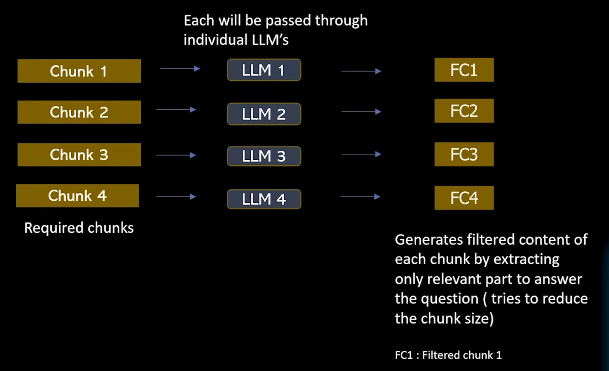)

In [140]:
query = "What is the launch price of Tata Motors Punch iCNG"

langchain.debug = True # this is kind of showing internal debugging
result = chain({"question":query}, return_only_outputs=True)
# 1. First it will retrieve the similar looking chunks from my database
# 2. there are total 4 similar looking chunks : jo 'context' and 'question' as a dictionary use krte hain
# 3. Question is same for all the 4 chunks
# 4. LLM/start se unme operations hote hain, means LLM khud hi propt generate krta hai and each chunk + query ko API me bhejkr ans nikalwata hai, each query

[chain/start] [chain:RetrievalQAWithSourcesChain] Entering Chain run with input:
{
  "question": "What is the launch price of Tata Motors Punch iCNG"
}
[chain/start] [chain:RetrievalQAWithSourcesChain > chain:MapReduceDocumentsChain] Entering Chain run with input:
[inputs]
[chain/start] [chain:RetrievalQAWithSourcesChain > chain:MapReduceDocumentsChain > chain:LLMChain] Entering Chain run with input:
{
  "input_list": [
    {
      "context": "Trending Topics\n\nRBI Monetary Policy LiveRBI CRR CutVishal Mega Mart IPO GMPHome Loan Interest RateGDP Growth Forecast\n\nTata Motors launches Punch iCNG, price starts at Rs 7.1 lakh\n\nThe Punch iCNG is equipped with the company's proprietary twin-cylinder technology with enhanced safety features like a micro-switch to keep the car switched off at the time of refuelling and thermal incident protection that cuts off CNG supply to the engine and releases gas into the atmosphere, Tata Motors said in a statement.\n\nPTI\n\nAugust 04, 2023 / 14:17 

It is using this map and reduce method

![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 819x461 - 55m51s].png](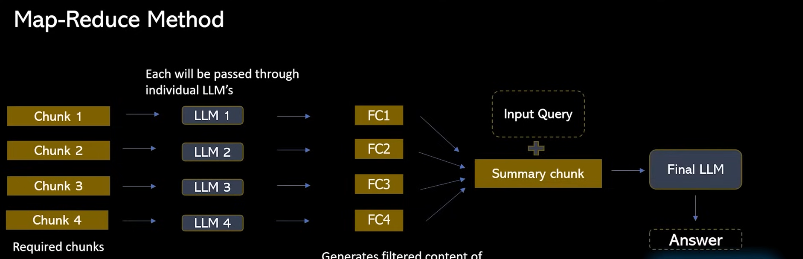)

In the provided process:

1. **Map Method**:
   - The system extracts relevant information from each document fragment (context).
   - Each document is processed independently to see if it contains relevant information.
   - Output: Relevant information is extracted and returned or marked as "no relevant text."

2. **Reduce Method**:
   - Aggregates the relevant information from all document fragments.
   - Summarizes or merges the extracted details to form a cohesive and final answer.
   - The final answer includes references ("SOURCES") for traceability.

### Example:
- **Map Output**:
  - "The launch price of Tata Motors Punch iCNG is Rs 7.1 lakh."
  - "Relevant text is: 'Tata Motors launches Punch iCNG, price starts at Rs 7.1 lakh.'"
  - Others indicate no relevant text.

- **Reduce Output**:
  - Final Answer: "The launch price of Tata Motors Punch iCNG is Rs 7.1 lakh."
  - SOURCES: Include URLs or citations from where the information was extracted.

Combinig all the individual pieces : Building the final app. Our individual pieces are ready. Assembling all the components.

In [ ]:
!pip install streamlit

In [142]:
## main.py

import os
import streamlit as st
import pickle
import time
from langchain import OpenAI
from langchain.chains import RetrievalQAWithSourcesChain
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import UnstructuredURLLoader
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import FAISS

from dotenv import load_dotenv
load_dotenv()  # take environment variables from .env (especially openai api key)

st.title("RockyBot: News Research Tool 📈")
st.sidebar.title("News Article URLs")

urls = []
for i in range(3):
    url = st.sidebar.text_input(f"URL {i+1}")
    urls.append(url)

process_url_clicked = st.sidebar.button("Process URLs")
file_path = "faiss_store_openai.pkl"

main_placeholder = st.empty()

llm = ChatGroq(
    model="llama-3.1-70b-versatile",
    temperature = 0.9,  # No randomness; deterministic responses
    max_tokens=500,  # Limit the response to 500 tokens
    groq_api_key = groq_api_key
)

if process_url_clicked:
    # load data
    loader = UnstructuredURLLoader(urls=urls)
    main_placeholder.text("Data Loading...Started...✅✅✅")
    data = loader.load()
    # split data
    text_splitter = RecursiveCharacterTextSplitter(
        separators=['\n\n', '\n', '.', ','],
        chunk_size=1000
    )
    main_placeholder.text("Text Splitter...Started...✅✅✅")
    docs = text_splitter.split_documents(data)
    # create embeddings and save it to FAISS index
    embeddings = OpenAIEmbeddings()
    vectorstore_openai = FAISS.from_documents(docs, embeddings)
    main_placeholder.text("Embedding Vector Started Building...✅✅✅")
    time.sleep(2)

    # Save the FAISS index to a pickle file
    with open(file_path, "wb") as f:
        pickle.dump(vectorstore_openai, f)

query = main_placeholder.text_input("Question: ")
if query:
    if os.path.exists(file_path):
        with open(file_path, "rb") as f:
            vectorstore = pickle.load(f)
            chain = RetrievalQAWithSourcesChain.from_llm(llm=llm, retriever=vectorstore.as_retriever())
            result = chain({"question": query}, return_only_outputs=True)
            # result will be a dictionary of this format --> {"answer": "", "sources": [] }
            st.header("Answer")
            st.write(result["answer"])

            # Display sources, if available
            sources = result.get("sources", "")
            if sources:
                st.subheader("Sources:")
                sources_list = sources.split("\n")  # Split the sources by newline
                for source in sources_list:
                    st.write(source)


2024-12-07 11:20:24.910 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 11:20:25.168 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-12-07 11:20:25.171 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 11:20:25.175 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 11:20:25.179 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 11:20:25.184 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 11:20:25.186 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-07 11:20:25.188 Thread 'MainThread': mi

In [143]:
!streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.34.13.198:8501

  Stopping...
  Stopping...


![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 1170x658 - 1h12m04s].png](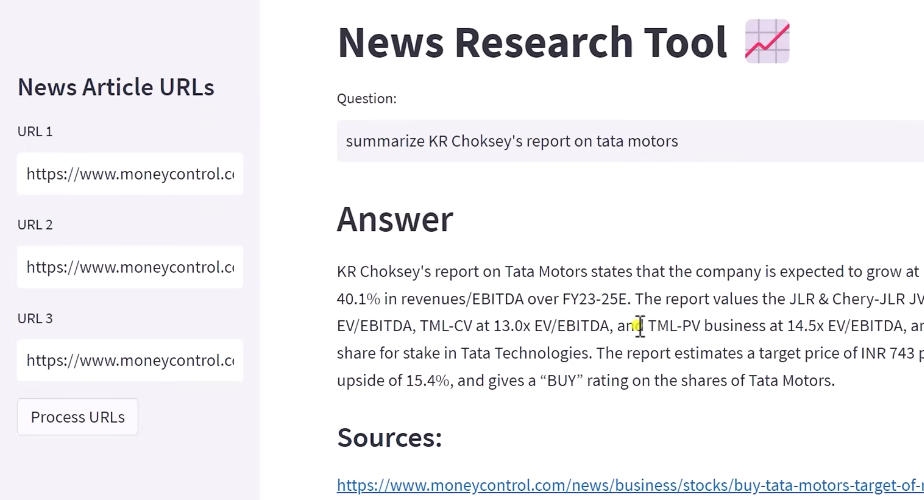)

Unstructured URL loaders are now, but it might stop working at some point, because websites can detect scralling activity and they might block you. This the reason ppl use tools like `brightdata` which is a proxy netwok based tool. Then same way create embeddings, it could be openai, hugging face etc, and store it in a vector database(in industry), otherwise you can use faiss as well, which is not a vector database, but it is a library; once you have data in the vector database, u can build UI in react or whatever tools. then call that vector database to retrieve the similar looking chunks. Post the answer back to chatbot


![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 819x461 - 1h13m10s].png](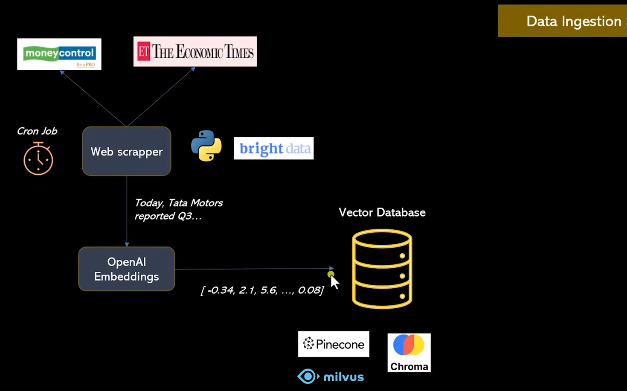)

![codebasics - LLM Project End to End Gen AI Project Using Langchain, OpenAI in Finance Domain [MoqgmWV1fm8 - 819x461 - 1h13m26s].png](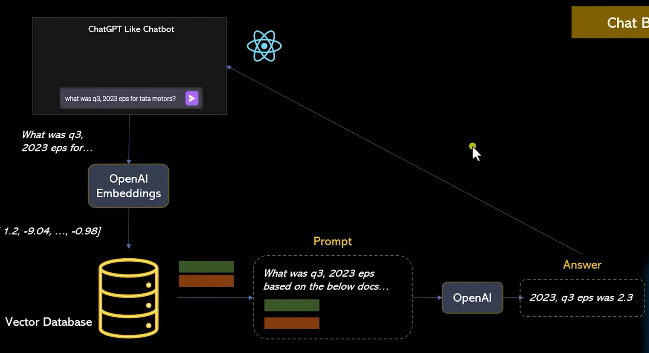)

Steps happening :
1. Data Loading using unstructured URL loader from all the 3 links
2. Splitting the text into 1000 tocken chunks
3. Building embedding using hugging face (model_name="all-mpnet-base-v2") api calls.
4. then it is using FAISS to kind of build an index and save it to a disc.
5. using this enbedings, stored in the disc in pkl file, read and load the binary pkl file.
6. using `RetrieveQAWithSourceChain.from_llm()` create a chain.
7. ask question from the chain, it will give the result. Because of the chain, first it will load some 4-5 relevant chunks and retrive the relevant parts from those chunks, then it wil merge all the relevant segments of the chunks, and merged chunk along with the query will be passed through api as the final llm cal, to get the final answer.